<a href="https://colab.research.google.com/github/ggieun/h.e.after/blob/main/%EA%B4%91%EA%B3%A0%EB%B9%84%EC%98%88%EC%B8%A1(%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/ad_data.csv')
data['Price_y'].count()

8163

In [ ]:
data.rename(columns={'ActionType_x': 'ActionType',
                    'CPC_ad_x': 'CPC_ad',
                    'Timestamp_x': 'Timestamp',
                    'Price_y': 'Price'
                    },inplace=True)

In [ ]:
data

,CustomerID,ActionType,GoodsCode,AdID_ad,CPC_ad,Timestamp,Price
0,6,ad_click,1437,ad_google,182.31,2022-05-07 21:00:59.166991,NaN
1,13,ad_click,1090,ad_google,158.68,2022-03-11 18:14:48.855443,NaN
2,14,ad_click,1000,ad_google,104.04,2022-03-07 10:33:24.548570,12580.0
3,30,ad_click,1451,ad_google,183.98,2022-04-20 23:35:21.707955,NaN
4,30,ad_click,1019,ad_google,108.28,2022-05-05 04:31:26.707955,NaN
...,...,...,...,...,...,...,...
172023,899965,ad_click,1377,ad_meta,131.82,2022-03-25 20:38:45.486139,NaN
172024,899993,ad_click,1174,ad_line,19.07,2022-02-28 05:16:16.372529,NaN
172025,899993,ad_click,1019,ad_meta,88.20,2022-05-09 09:32:29.372529,NaN
172026,899999,ad_click,1059,ad_meta,71.35,2022-04-06 21:09:47.722389,NaN


In [ ]:
data['Price'] = data['Price'].fillna(0)

In [ ]:
data

,CustomerID,ActionType,GoodsCode,AdID_ad,CPC_ad,Timestamp,Price
0,6,ad_click,1437,ad_google,182.31,2022-05-07 21:00:59.166991,0.0
1,13,ad_click,1090,ad_google,158.68,2022-03-11 18:14:48.855443,0.0
2,14,ad_click,1000,ad_google,104.04,2022-03-07 10:33:24.548570,12580.0
3,30,ad_click,1451,ad_google,183.98,2022-04-20 23:35:21.707955,0.0
4,30,ad_click,1019,ad_google,108.28,2022-05-05 04:31:26.707955,0.0
...,...,...,...,...,...,...,...
172023,899965,ad_click,1377,ad_meta,131.82,2022-03-25 20:38:45.486139,0.0
172024,899993,ad_click,1174,ad_line,19.07,2022-02-28 05:16:16.372529,0.0
172025,899993,ad_click,1019,ad_meta,88.20,2022-05-09 09:32:29.372529,0.0
172026,899999,ad_click,1059,ad_meta,71.35,2022-04-06 21:09:47.722389,0.0


# **매출로 확인한 예측모델**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data_group = data.groupby(pd.Grouper(key='Timestamp', freq='D')).agg({'CPC_ad': 'sum', 'Price':'sum'}).reset_index()
data_group

,Timestamp,CPC_ad,Price
0,2022-02-01,762.86,0.0
1,2022-02-02,5483.83,76930.0
2,2022-02-03,14932.20,192650.0
3,2022-02-04,19992.63,541270.0
4,2022-02-05,25314.80,316220.0
...,...,...,...
469,2023-05-16,0.00,0.0
470,2023-05-17,0.00,0.0
471,2023-05-18,0.00,0.0
472,2023-05-19,0.00,0.0


In [ ]:
# 필터링할 연도와 월 설정
target_year = 2022
target_month = 6

# 특정 연도와 월까지의 데이터 필터링
filtered_df = data_group[(data_group['Timestamp'].dt.year == target_year) & (data_group['Timestamp'].dt.month <= target_month)]


Mean Squared Error: 42446474109.66435
R-squared: 0.9613737997663468
회귀식: y = 8.007419211703166 * X + -4200.470775089925


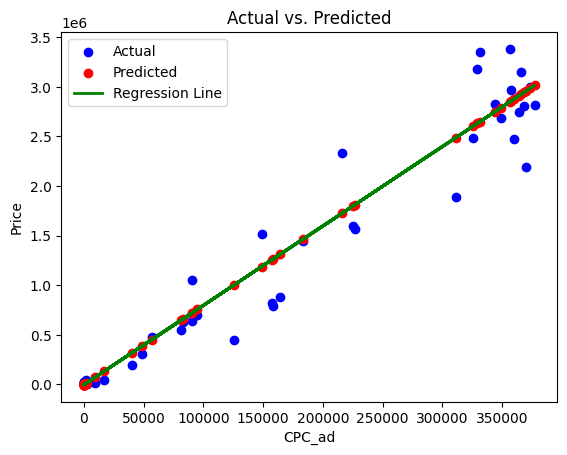

In [ ]:
# 독립 변수와 종속 변수 선택
X = data_group['CPC_ad']
y = data_group['Price']

# 2차원 배열로 변환
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# 회귀식 출력
print("회귀식: y =", model.coef_[0][0], "* X +", model.intercept_[0])


import matplotlib.pyplot as plt

# 실제값과 예측값 산점도
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# 회귀선 추가
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

# 축 및 타이틀 설정
plt.xlabel('CPC_ad')
plt.ylabel('Price')
plt.title('Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()

# **주문건수로 확인한 예측모델**

In [ ]:
data_group2 = data.groupby(pd.Grouper(key='Timestamp', freq='D')).agg({
    'CPC_ad': 'sum',  # 'b' 칼럼의 합계를 구함
    'Price': lambda x: (x != 0).sum()  # 'c' 칼럼에서 0이 아닌 값을 카운트
}).reset_index()
data_group2['Price'].sum()

8163

In [ ]:
data_group2.rename(columns={'Price': 'orders'},inplace=True)
data_group2

,Timestamp,CPC_ad,orders
0,2022-02-01,762.86,0
1,2022-02-02,5483.83,2
2,2022-02-03,14932.20,4
3,2022-02-04,19992.63,13
4,2022-02-05,25314.80,9
...,...,...,...
469,2023-05-16,0.00,0
470,2023-05-17,0.00,0
471,2023-05-18,0.00,0
472,2023-05-19,0.00,0


In [ ]:
# 필터링할 연도와 월 설정
target_year = 2022
target_month = 6

# 특정 연도와 월까지의 데이터 필터링
filtered_df = data_group2[(data_group2['Timestamp'].dt.year == target_year) & (data_group2['Timestamp'].dt.month <= target_month)]


Mean Squared Error: 21.810329936135844
R-squared: 0.979206533915012
회귀식: y = 0.00024793642535043974 * X + -0.1506692100832936


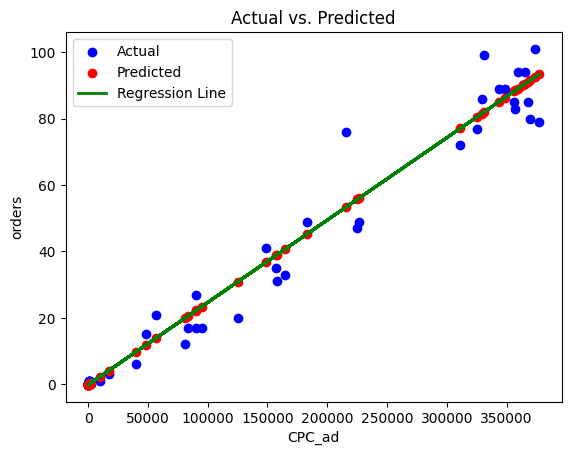

In [ ]:
# 독립 변수와 종속 변수 선택
X = data_group2['CPC_ad']
y = data_group2['orders']

# 2차원 배열로 변환
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# 회귀식 출력
print("회귀식: y =", model.coef_[0][0], "* X +", model.intercept_[0])


import matplotlib.pyplot as plt

# 실제값과 예측값 산점도
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# 회귀선 추가
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

# 축 및 타이틀 설정
plt.xlabel('CPC_ad')
plt.ylabel('orders')
plt.title('Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()

# **카테고리별 예측모델**

In [ ]:
inventory= pd.read_csv('/content/drive/MyDrive/real_inventor.csv')

In [ ]:
merged_data = pd.merge(data,inventory , on= 'GoodsCode' , how= 'left' )

In [ ]:
merged_data

,CustomerID,ActionType,GoodsCode,AdID_ad,CPC_ad,Timestamp,Price,Category,OriginalPrice,Inventory
0,6,ad_click,1437,ad_google,182.31,2022-05-07 21:00:59.166991,0.0,Home & Garden,35290.571517,3056
1,13,ad_click,1090,ad_google,158.68,2022-03-11 18:14:48.855443,0.0,Home & Garden,21095.247319,8617
2,14,ad_click,1000,ad_google,104.04,2022-03-07 10:33:24.548570,12580.0,Books,12578.785587,4452
3,30,ad_click,1451,ad_google,183.98,2022-04-20 23:35:21.707955,0.0,Books,18470.814342,9601
4,30,ad_click,1019,ad_google,108.28,2022-05-05 04:31:26.707955,0.0,Books,16844.272142,3106
...,...,...,...,...,...,...,...,...,...,...
172023,899965,ad_click,1377,ad_meta,131.82,2022-03-25 20:38:45.486139,0.0,Clothing,21028.690822,9884
172024,899993,ad_click,1174,ad_line,19.07,2022-02-28 05:16:16.372529,0.0,Books,7206.102214,9502
172025,899993,ad_click,1019,ad_meta,88.20,2022-05-09 09:32:29.372529,0.0,Books,16844.272142,3106
172026,899999,ad_click,1059,ad_meta,71.35,2022-04-06 21:09:47.722389,0.0,Clothing,21230.257553,4629


In [ ]:
merged_data_group = merged_data[merged_data['Category'] == 'Electronics'].groupby([pd.Grouper(key='Timestamp', freq='D'), 'Category']).agg({
    'CPC_ad': 'sum',  # 'b' 칼럼의 합계를 구함
    'Price': lambda x: (x != 0).sum()  # 'c' 칼럼에서 0이 아닌 값을 카운트
}).reset_index()
merged_data_group

,Timestamp,Category,CPC_ad,Price
0,2022-02-01,Electronics,507.62,0
1,2022-02-02,Electronics,3009.01,1
2,2022-02-03,Electronics,8647.92,2
3,2022-02-04,Electronics,11986.82,4
4,2022-02-05,Electronics,13941.24,2
...,...,...,...,...
271,2023-03-11,Electronics,529.39,0
272,2023-03-14,Electronics,375.82,0
273,2023-03-16,Electronics,471.32,0
274,2023-03-18,Electronics,441.83,1


In [ ]:
merged_data_group.rename(columns={'Price': 'orders'},inplace=True)
merged_data_group

,Timestamp,Category,CPC_ad,orders
0,2022-02-01,Electronics,507.62,0
1,2022-02-02,Electronics,3009.01,1
2,2022-02-03,Electronics,8647.92,2
3,2022-02-04,Electronics,11986.82,4
4,2022-02-05,Electronics,13941.24,2
...,...,...,...,...
271,2023-03-11,Electronics,529.39,0
272,2023-03-14,Electronics,375.82,0
273,2023-03-16,Electronics,471.32,0
274,2023-03-18,Electronics,441.83,1


Mean Squared Error: 6.680252340186455
R-squared: 0.876594772980533
회귀식: y = 9.747713361894455e-05 * X + -0.039116457994586185


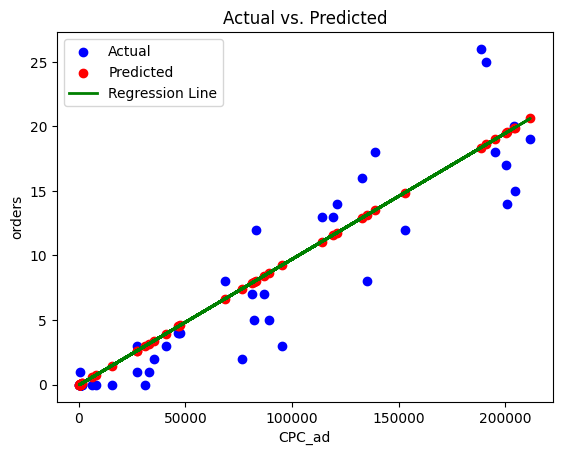

In [ ]:
# 독립 변수와 종속 변수 선택
X = merged_data_group['CPC_ad']
y = merged_data_group['orders']

# 2차원 배열로 변환
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# 회귀식 출력
print("회귀식: y =", model.coef_[0][0], "* X +", model.intercept_[0])


import matplotlib.pyplot as plt

# 실제값과 예측값 산점도
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# 회귀선 추가
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

# 축 및 타이틀 설정
plt.xlabel('CPC_ad')
plt.ylabel('orders')
plt.title('Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()